# Chapter7. 

In [1]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
# 경고 메세지 제거
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', 'This pattern has match groups')
warnings.filterwarnings('ignore', 'The iterable function was deprecated in Matplotlib')

----------------------------

In [4]:
from sklearn.datasets import load_files

reviews_train = load_files("data/ACLIMDB/train/")
# 텍스트와 레이블을 포함하고 있는 Bunch 오브젝트를 반환합니다.
text_train, y_train = reviews_train.data, reviews_train.target
print("text_train의 타입:", type(text_train))
print("text_train의 길이:", len(text_train))
print("text_train[6]:\n", text_train[6])

text_train의 타입: <class 'list'>
text_train의 길이: 25000
text_train[6]:
 b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [5]:
#  줄바꿈 테그 <br /> 제거.
text_train = [doc.replace(b'<br />', b' ') for doc in text_train ]

In [6]:
print("text_train[6]:\n", text_train[6])

text_train[6]:
 b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.  Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life.   I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [7]:
print('클래스별 샘플 수 (훈련 데이터) : ', np.bincount(y_train))

클래스별 샘플 수 (훈련 데이터) :  [12500 12500]


In [8]:
y_train.shape

(25000,)

In [9]:
reviews_test = load_files("data/ACLIMDB/test/")
# 텍스트와 레이블을 포함하고 있는 Bunch 오브젝트를 반환합니다.
text_test, y_test = reviews_test.data, reviews_test.target
print("text_test의 타입:", type(text_test))
print("text_test의 길이:", len(text_test))
print('클래스별 샘플 수 (훈련 데이터) : ', np.bincount(y_test))
text_test = [doc.replace(b'<br />', b' ') for doc in text_test ]

text_test의 타입: <class 'list'>
text_test의 길이: 25000
클래스별 샘플 수 (훈련 데이터) :  [12500 12500]


# 7.3.1 샘플 데이터에 BOW 적용하기

In [26]:
bards_words =["The fool doth think he is wise,",
              "but the wise man knows himself to be a fool"]

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

In [32]:
print('어휘 사전의 크기 : ', len(vect.vocabulary_))
print('어휘 사전의 내용 \n', vect.vocabulary_)

어휘 사전의 크기 :  13
어휘 사전의 내용 
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [35]:
bag_of_words = vect.transform(bards_words)
print('BOW : ', repr(bag_of_words))

BOW :  <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [36]:
print('BOW의 밀집 표현 : \n', bag_of_words.toarray())

BOW의 밀집 표현 : 
 [[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


# 7.3.2 영화 리뷰에 대한 BOW

In [38]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)

print('X_train : \n', repr(X_train))

X_train : 
 <25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [42]:
feature_names = vect.get_feature_names()
print('특성 개수 : ', len(feature_names))
print('처음 20개 특성 : \n', feature_names[:20])
print('20010에서 20030까지 특성 : \n', feature_names[20010:20030])
print('매 2000번째 특성 : \n', feature_names[::2000])

특성 개수 :  74849
처음 20개 특성 : 
 ['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
20010에서 20030까지 특성 : 
 ['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']
매 2000번째 특성 : 
 ['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print('교차 검증 평균 점수 : {:.2f}'.format(np.mean(scores)))

교차 검증 평균 점수 : 0.88


In [47]:
scores

array([0.8834, 0.8756, 0.886 , 0.8894, 0.8752])

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print('최상의 교차 검증 점수 : {:.2f}'.format(grid.best_score_))
print('최적의 매개변수 : ', grid.best_params_)

최상의 교차 검증 점수 : 0.89
최적의 매개변수 :  {'C': 0.1}


In [56]:
X_test = vect.transform(text_test)
print('테스트 점수 : {:.2f}'.format(grid.score(X_test, y_test)))

테스트 점수 : 0.88


In [57]:
vect = CountVectorizer(min_df=5).fit(text_train)

In [58]:
feature_names = vect.get_feature_names()

print('특성 개수 : ', len(feature_names))
print('처음 50개 특성 : \n', feature_names[:50])
print('20010에서 20030까지 특성 : \n', feature_names[20010:20030])
print('매 2000번째 특성 : \n', feature_names[::700])

특성 개수 :  27271
처음 50개 특성 : 
 ['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']
20010에서 20030까지 특성 : 
 ['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
매 2000번째 특성 : 
 ['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest', 'hauser', 'hungary', 'insinuate', 'juggle', 'leering', 'maelstrom', 'messiah', 'music', 'occasional', 'parking', 'pleasantville', 'pronunci

27271개로 토큰의 수가 크게 감소함

In [62]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print('최적의 교차 검증 점수 : {:.2f}'.format(grid.best_score_))

최적의 교차 검증 점수 : 0.89


# 7.4 불용어

In [63]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print('불용어 개수 : ', len(ENGLISH_STOP_WORDS))
print('매 10번째 불용어 : \n', list(ENGLISH_STOP_WORDS)[::10])

불용어 개수 :  318
매 10번째 불용어 : 
 ['etc', 'by', 'only', 'put', 'itself', 'via', 'of', 'eight', 'during', 'when', 'over', 'thereupon', 'i', 'an', 'others', 'less', 'can', 'neither', 'under', 'six', 'always', 'cannot', 'to', 'around', 'amongst', 'bill', 'however', 'fifteen', 'the', 'both', 'my', 'myself']


In [65]:
vect = CountVectorizer(min_df=5, stop_words='english').fit(text_train)
X_train = vect.transform((text_train))
print('불용어가 제거된 X_train : \n', repr(X_train))

불용어가 제거된 X_train : 
 <25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [66]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print('최상의 교차 검증 점수 : {:.2f}'.format(grid.best_score_))

최상의 교차 검증 점수 : 0.88


In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
param_grid = {'logisticregression__C' : [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print('최상의 교차 검증 점수 : {:.2f}'.format(grid.best_score_))

최상의 교차 검증 점수 : 0.89


In [72]:
vectorizer = grid.best_estimator_.named_steps['tfidfvectorizer']

X_train = vectorizer.transform(text_train)
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

feature_names = np.array(vectorizer.get_feature_names())

print('가장 낮은 tfidf를 가진 특성 : \n', feature_names[sorted_by_tfidf[:20]])
print('가장 높은 tfidf를 가진 특성 : \n', feature_names[sorted_by_tfidf[:-20]])

가장 낮은 tfidf를 가진 특성 : 
 ['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
가장 높은 tfidf를 가진 특성 : 
 ['suplexes' 'gauche' 'hypocrites' ... 'tanner' 'brendan' 'muppet']


In [73]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print('가장 낮은 idf를 가진 특성 : \n', feature_names[sorted_by_idf[:100]])

가장 낮은 idf를 가진 특성 : 
 ['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


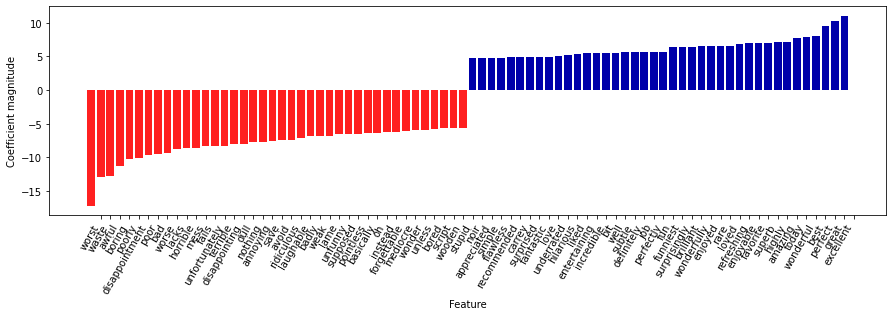

In [74]:
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_[0],
    feature_names, n_top_features=40)

# 7.7 여러 단어로 만든 BOW(n-그램)

In [75]:
print('bards_words : \n', bards_words)

bards_words : 
 ['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [79]:
cv = CountVectorizer(ngram_range=(1,1)).fit(bards_words)
print('어휘 사전 크기 : ', len(cv.vocabulary_))
print('어휘 사전 : \n', cv.get_feature_names())

어휘 사전 크기 :  13
어휘 사전 : 
 ['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


In [80]:
cv = CountVectorizer(ngram_range=(2,2)).fit(bards_words)
print('어휘 사전 크기 : ', len(cv.vocabulary_))
print('어휘 사전 : \n', cv.get_feature_names())

어휘 사전 크기 :  14
어휘 사전 : 
 ['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


In [81]:
print('변환된 데이터 (밀집 배열) : \n', cv.transform(bards_words).toarray())

변환된 데이터 (밀집 배열) : 
 [[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [82]:
cv = CountVectorizer(ngram_range=(1,3)).fit(bards_words)

print('어휘 사전 크기 : ', len(cv.vocabulary_))
print('어휘 사전 : \n', cv.get_feature_names())

어휘 사전 크기 :  39
어휘 사전 : 
 ['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


In [ ]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())

param_grid = {'logisticregression__C' : [0.001, 0.01, 0.1, 1, 10, 100],
             'tfidfvectorizer__ngram_range' : [(1,1), (1,2), (1,3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)

print('최상의 교차 검증 점수 : {:.2f}'.format(grid.best_score_))
print('최적의 매개변수 : \n', grid.best_params_)

In [ ]:
scores = grid.cv_results_['mean_test_score'].reshape(-1,3).T

heatmap = mglearn.tools.heatmap(scores, xlabel='C', ylabel='ngram_range', cmap='viridis', fmt='%.3f',
                               xticklabels=param_grid['logisticregression__C'],
                               yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

In [ ]:
*

# 7.8 고급 토큰화, 어간 추출, 표제어 추출

In [5]:
conda install nltk spacy

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 

Note: you may need to restart the kernel to use updated packages.



Examining @/win-64::__win==0=0:  38%|###8      | 134/352 [00:35<00:50,  4.29it/s]


Examining blas: 100%|#########9| 351/352 [01:43<00:01,  1.24s/it]                    
                                                                 

Determining conflicts:   0%|          | 0/352 [00:00<?, ?it/s]
Examining conflict for python-language-server anaconda flake8 spyder:   0%|          | 0/352 [00:00<?, ?it/s]
Examining conflict for flake8 spyder anaconda mccabe pylint python-language-server:   0%|          | 1/352 [00:05<33:27,  5.72s/it]
Examining conflict for flake8 spyder anaconda mccabe pylint python-language-server:   1%|          | 2/352 [00:05<16:40,  2.86s/it]
Examining conflict for flake8 autopep8 spyder anaconda pycodestyle python-language-server:   1%|          | 2/352 [00:11<16:40,  2.86s/it]
Examining conflict for flake8 autopep8 spyder anaconda pycodestyle python-language-server:   1%|          | 3/352 [00:11<21:07,  3.63s/it]
Examining conflict for flake8 statsmodels atomicwrites qt hdf5 jpeg itsdangerous qdarkstyle nbconvert heapdict cffi ipywidgets krb5 

In [ ]:
python -m spacy download en

In [ ]:
import spacy
print('spacy 버전 : spacy.__version__')
import nltk
print('nltk 버전 : nltk.__version__')

In [ ]:
import nltk
import spacy

en_help = spacy.load('en')
stemmer = nltk.PorterStemmer()

def compare_normalization(doc):
    doc_spacy = en_nlp(doc)
    print('표제어 : ')
    print([token.lemma_ for token in doc_apcy])
    
    print('어간 : ')
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

In [ ]:
compare_normalization(u"Our meeting today was worse than yesterday, "
                       "I'm scared of meeting the clients tomorrow.")

In [ ]:
en_nlp = spacy.load('en', disable=['parser', 'ner'])

def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

lemma_vect = Countvectorizer(tokenizer=custom_tokenizer, min_df=5)

In [ ]:
pip install --upgrade pip